<a href="https://colab.research.google.com/github/Kavya2099/Car-Price-Prediction/blob/main/Car_price_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning for Regression

2.2 Data preparation

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
!wget $data 

--2022-09-21 02:13:35--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.2’

data.csv.2          100%[===================>]   1.41M  --.-KB/s    in 0.1s    

2022-09-21 02:13:36 (10.9 MB/s) - ‘data.csv.2’ saved [1475504/1475504]



In [ ]:
car= pd.read_csv('data.csv')
car.head()
car.shape

(11914, 16)

In [ ]:
car.columns =car.columns.str.lower().str.replace(' ','_')
car.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
strings= list(car.dtypes[car.dtypes=='object'].index)
print(strings)
type(strings)

['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']


list

In [ ]:
for col in strings:
  car[col]= car[col].str.lower().str.replace(' ','_')

car.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


EDA- Exploratory data analysis

In [ ]:
for col in car.columns:
  print(col)
  print(car[col].unique()[:5])
  print(car[col].nunique())

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
year
[2011 2012 2013 1992 1993]
28
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
engine_hp
[335. 300. 230. 320. 172.]
356
engine_cylinders
[ 6.  4.  5.  8. 12.]
9
transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5
driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4
number_of_doors
[ 2.  4.  3. nan]
3
market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71
vehicle_size
['compact' 'midsize' 'large']
3
vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16
highway_mpg
[26 28 27 25 24]
59
city_mpg
[19 20 18 17 16]
69
popularity
[3916 3105  819  617 1013]
48
msrp
[46135 40650 36350 29450 34500]
6049


checking the distribution of price

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

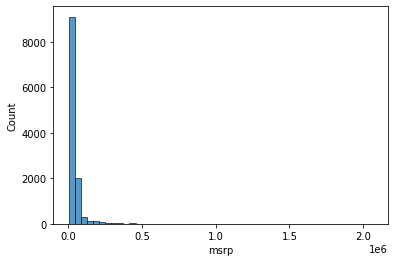

In [ ]:
sns.histplot(car.msrp,bins=50)


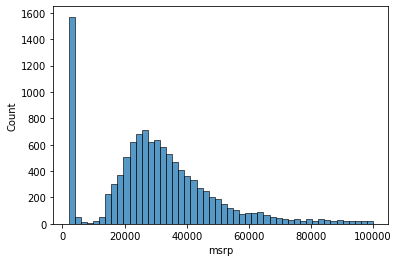

In [ ]:
sns.histplot(car.msrp[car.msrp<10**5], bins=50)

using log expression to remove the tail part

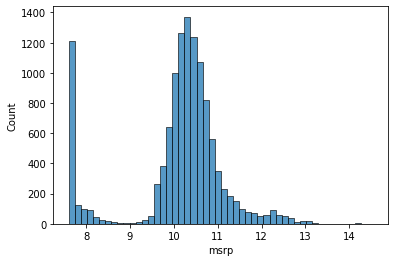

In [ ]:
car_prices= np.log1p(car.msrp)
car_prices
sns.histplot(car_prices,bins=50)

note: the values in above graph are in log value

Find the missing values

In [ ]:
car.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

2.4 Setting up the validation framework

1. Setting training, validation and testing datas ready


In [ ]:
car.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y = car.msrp
features=['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']

X= car[features]
#print(X.isnull().sum())
#to check the na values after filling na, use this
#print(X.fillna(0).isnull().sum())
X= X.fillna(0)

#X.isnull().sum()

# set aside 20% of train and test data for evaluation


#len(train_X), len(test_X), len(val_X)
#train_y.head()




Setting a function for test train test split

In [ ]:
def dataset(X,y):


  train_X, val_X, train_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
  train_X, test_X, train_y, test_y = train_test_split(train_X, train_y, test_size=0.25,random_state = 0)
  
  score_model (train_X, val_X, train_y, val_y)

using model and comparing values with plot and getting root error values in a single function

In [ ]:

def score_model(train_X, val_X, train_y, val_y):
  forest_model= RandomForestRegressor(random_state=2)
  forest_model.fit(train_X, train_y)
  preds= forest_model.predict(val_X)
  sns.histplot(preds, alpha=0.5, color='red', bins=50)
  sns.histplot(val_y, alpha=0.5, color='green', bins=50 )

  print(mean_absolute_error(val_y, preds))
  val_y_1= np.log1p(val_y)
  preds_1= np.log1p(preds)
  print(mean_squared_error(val_y_1, preds_1,squared=False))
  return 0

4413.848783724376
0.33378362880093754


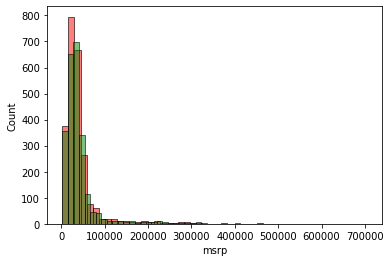

In [ ]:
dataset(X,y)
#first value 
#4413.848783724376 mae
#0.33378362880093754 mse

taking log values for y 

In [ ]:
#train_y= np.log1p(train_y)
#test_y=
#val_y=
#train_y.head()

Feature engineering

adding new column to get better prediction

note: try with scaling and normalization

In [ ]:
c= car.copy()

c['age']=2017 - c['year']
#features.append('age')
#print(features.len())
#features.insert(len(features), "age")
#features.remove('age')
#print(features)
#c= c[features]
#features=['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']



# to add feature only one time
if 'age' not in features:
  features.append('age')


print(features)
c= c[features]
X=c[features]
X=X.fillna(0)
X.head()



['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age']


,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity,age
0,335.0,6.0,26,19,3916,6
1,300.0,6.0,28,19,3916,6
2,300.0,6.0,28,20,3916,6
3,230.0,6.0,28,18,3916,6
4,230.0,6.0,28,18,3916,6


In [ ]:
print(len(features))

6


4170.292052405724
0.1433231243840296


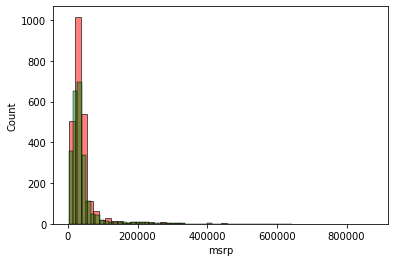

In [ ]:
dataset(X,y)


#first value 
#4413.848783724376 mae
#0.33378362880093754 mse

#second value after feature enginnering 
#4170.292052405724 mae
#0.1433231243840296 mse

Categorical variables with pipeline 

In [ ]:
y = car.msrp
X= car.drop(['msrp'],axis=1)


train_X_full, val_X_full, train_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
train_X_full, test_X_full, train_y, test_y = train_test_split(train_X_full, train_y, test_size=0.25,random_state = 0)


#categorical variables

categorical_cols = [cname for cname in train_X_full.columns if train_X_full[cname].nunique() < 10 and 
                        train_X_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in train_X_full.columns if train_X_full[cname].dtype in ['int64', 'float64']]



my_cols = categorical_cols + numerical_cols
X_train = train_X_full[my_cols].copy()
X_valid = val_X_full[my_cols].copy()

1 step in pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


step 2 in pipeline

In [ ]:

model = RandomForestRegressor(n_estimators=100, random_state=0)

step 3 in pipeline

In [ ]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, train_y)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(val_y, preds)
print('MAE:', score)
val_y_1= np.log1p(val_y)
preds_1= np.log1p(preds)
print(mean_squared_error(val_y_1, preds_1,squared=False))


MAE: 3981.505335714665
0.13440796090540894


first value 

1.   4413.848783724376 mae
2.   0.33378362880093754 mse

second value after feature enginnering 
1.   4170.292052405724 mae
2.   0.1433231243840296 mse

with pipeline

1.   MAE: 3981.505335714665
2.   0.13440796090540894 mse




Trying with XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn import metrics

y = car.msrp
X= car.drop(['msrp'],axis=1)
X_train_full, X_valid_full, train_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
X_train_full, X_test_full, train_y, test_y = train_test_split(X_train_full, train_y, test_size=0.25,random_state = 0)
for colname in X_train_full.select_dtypes(["category", "object"]):
        X_train_full[colname], _ = X_train_full[colname].factorize()
        X_valid_full[colname], _ = X_valid_full[colname].factorize()

my_model_1 = XGBRegressor(random_state=0)
my_model_1.fit(X_train_full, train_y)
expected_y  = val_y
predicted_y = my_model_1.predict(X_valid_full)

#print(predicted_y, expected_y)
score = mean_absolute_error(predicted_y, expected_y)
print('MAE:', score)

#print(metrics.mean_squared_error(predicted_y,expected_y))

val_y_1= np.log1p(expected_y)
preds_1= np.log1p(predicted_y)
#print(mean_squared_error(val_y_1, preds_1,squared=False))

[02:13:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 8954.012986474112


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log1p


XGB gave MAE greater value. We'll check with cross validation method

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

y = car.msrp
X= car.drop(['msrp'],axis=1)

for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()

mypipe= Pipeline(steps=[('preprocessor',SimpleImputer()),('model',RandomForestRegressor(n_estimators=50,random_state=0))])

scores= -1 * cross_val_score(mypipe,X,y,cv=5,scoring='neg_mean_absolute_error')
print("score: ",scores.mean())

score:  10575.505751099268


now testing with test data with pipeline model since it showed less MAE and MSE

In [ ]:
preds = my_pipeline.predict(test_X_full)

# Evaluate the model
score = mean_absolute_error(test_y, preds)
print('MAE:', score)
val_y_1= np.log1p(test_y)
preds_1= np.log1p(preds)
print(mean_squared_error(val_y_1, preds_1,squared=False))

MAE: 4865.605287388689
0.16175299132711182


In [ ]:
car_20 = test_X_full.iloc[20].to_dict()
car_20

{'make': 'gmc',
 'model': 'envoy_xl',
 'year': 2005,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 300.0,
 'engine_cylinders': 8.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'rear_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': '4dr_suv',
 'highway_mpg': 19,
 'city_mpg': 13,
 'popularity': 549}

In [ ]:
df_small = pd.DataFrame([car_20])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,gmc,envoy_xl,2005,regular_unleaded,300.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,19,13,549


In [ ]:
preds = my_pipeline.predict(df_small)
print("predicted value: ",preds)
print("actual value:", test_y.iloc[20])

#3754 difference

predicted value:  [34406.87265152]
actual value: 38160
